# Application to Bioproduct-Types Toy Submodel, version 9

## Set up packages.

In [1]:
require(abind)
require(data.table)
require(deSolve)
require(magrittr)
require(np)
require(rTensor)

require(ggplot2)
require(GGally)

Loading required package: abind
Loading required package: data.table
Loading required package: deSolve
Loading required package: magrittr
Loading required package: np
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘np’”Loading required package: rTensor
Loading required package: ggplot2
Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## Read output and check for reasonableness.

In [88]:
ys = fread("framework/ys.tsv")
ys %>% summary

    sequence           Year         Adopters       NonAdopters    
 Min.   :   1.0   Min.   :2015   Min.   :     0   Min.   :     0  
 1st Qu.: 219.0   1st Qu.:2022   1st Qu.:   250   1st Qu.:   523  
 Median : 469.0   Median :2032   Median :  2250   Median : 77564  
 Mean   : 482.5   Mean   :2032   Mean   : 30741   Mean   : 57893  
 3rd Qu.: 739.0   3rd Qu.:2042   3rd Qu.: 88637   3rd Qu.: 98319  
 Max.   :1012.0   Max.   :2050   Max.   :103500   Max.   :102720  
 Potential Adopters
 Min.   :     0.0  
 1st Qu.:   101.6  
 Median :  2346.1  
 Mean   : 13116.0  
 3rd Qu.: 18352.0  
 Max.   :100003.0  

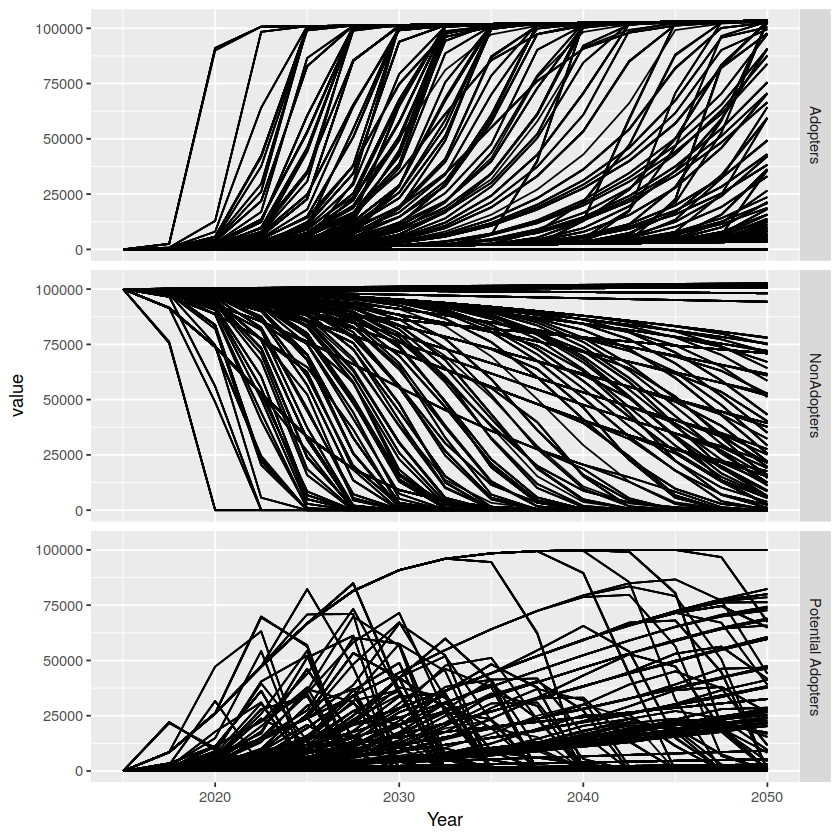

In [89]:
ggplot(
    melt(ys, id.vars=c("sequence", "Year")),
    aes(x=Year, y=value, group=sequence)) +
geom_line() +
facet_grid(variable ~ .)

## Read input and plot sampling.

In [140]:
xs = fread("framework/xs.tsv")
xs %>% dim

[1] 3184   18

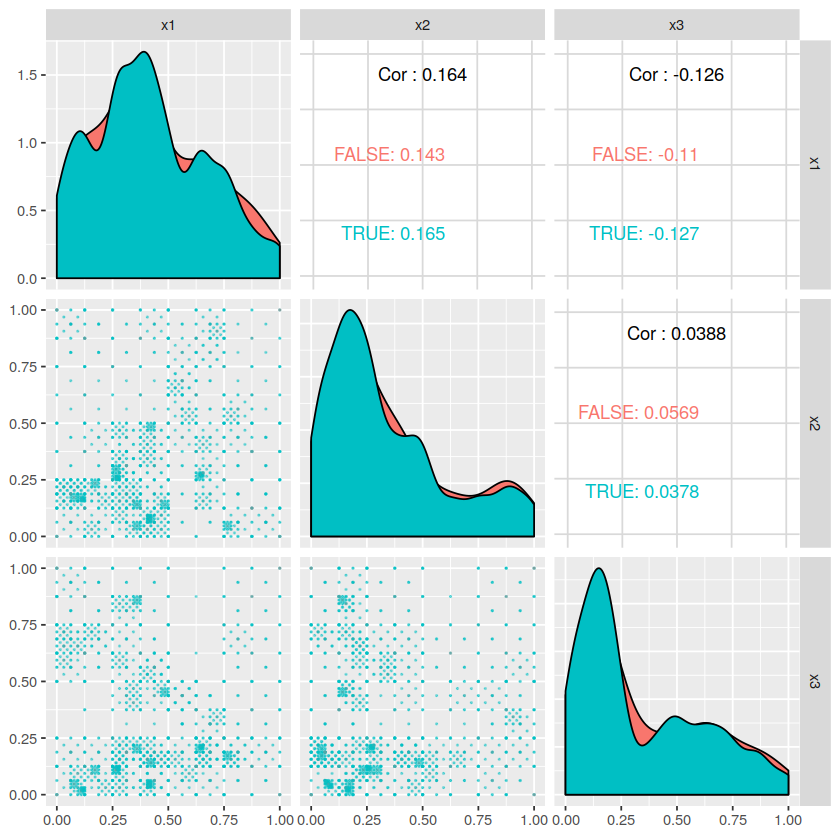

In [141]:
ggpairs(
    xs,
    6:8,
    mapping = aes(color=!probed),
    lower = list(continuous = wrap("points", alpha = 0.25, size=0.25))
)

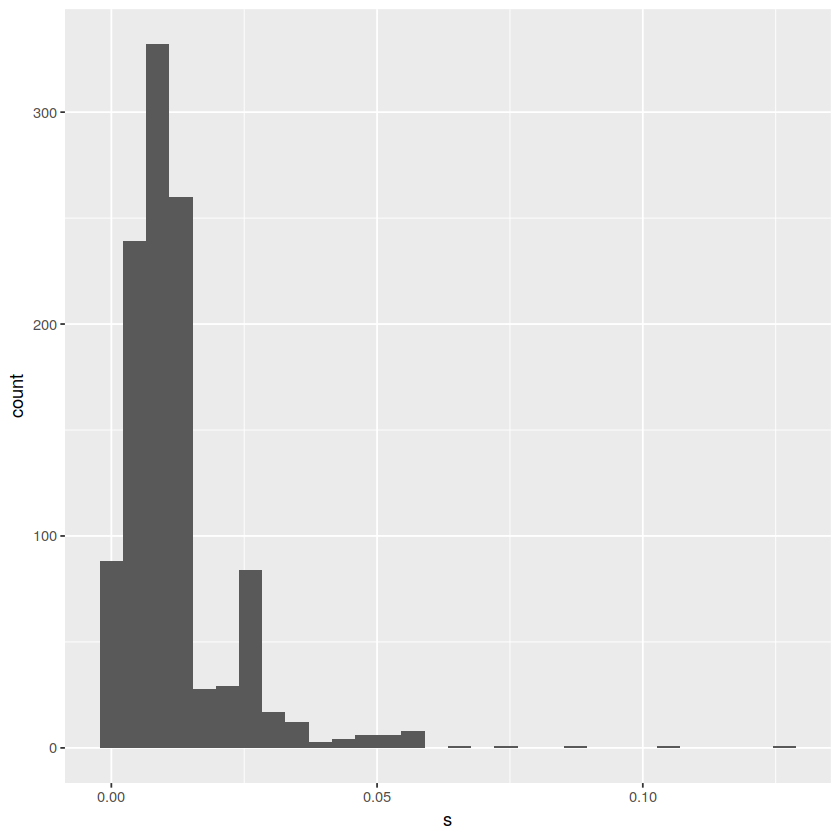

In [142]:
ggplot(xs[!is.na(s)], aes(x=s)) + geom_histogram(bins=30)